In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [ ]:
df=pd.read_csv('SmartWatch_Health_Data.csv')
print(df.head(5))
print(df.shape[0])

   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   3363.0         92.852837               98.270679   4115.534710   
1   3061.0         79.382035               98.785674  33956.717090   
2   4060.0         62.478390               99.982566  12862.301510   
3   3041.0         64.799778               94.743857   4613.859266   
4   3824.0         78.179709               97.915236   2594.460563   

  Sleep Duration (hours) Activity Level Stress Level  
0            5.790921105         Active            1  
1            4.516866155         Active            7  
2            4.554312522      Sedentary            6  
3                  ERROR  Highly_Active           10  
4            6.635850438  Highly Active           10  
1900


In [ ]:
data=df['User ID'].drop_duplicates()
print(data)

0       3363.0
1       3061.0
2       4060.0
3       3041.0
4       3824.0
         ...  
1894    3421.0
1895    4023.0
1897    1704.0
1898    4608.0
1899    3513.0
Name: User ID, Length: 1466, dtype: float64


In [ ]:
# Calculate missing values in the unique User IDs Series (data) and display it
data.isna().sum()

1

In [ ]:
# Drop rows with missing User IDs in the original DataFrame
data.dropna(inplace=True)
print(data)

0       3363.0
1       3061.0
2       4060.0
3       3041.0
4       3824.0
         ...  
1894    3421.0
1895    4023.0
1897    1704.0
1898    4608.0
1899    3513.0
Name: User ID, Length: 1465, dtype: float64


In [ ]:
# Assuming the column containing 'ERROR' is named 'Column_Name'
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].replace('ERROR', np.nan)
df['Stress Level'] = df['Stress Level'].replace('Very High', '20')
print(df['Sleep Duration (hours)'])
print(df['Stress Level'])

0       5.790921105
1       4.516866155
2       4.554312522
3               NaN
4       6.635850438
           ...     
1895    5.750375366
1896    7.214115099
1897    5.946470751
1898    5.530567332
1899     6.33299473
Name: Sleep Duration (hours), Length: 1900, dtype: object
0        1
1        7
2        6
3       10
4       10
        ..
1895     7
1896     1
1897     1
1898    10
1899     9
Name: Stress Level, Length: 1900, dtype: object


In [ ]:
# Drop rows where all values are NaN
df_dropped_all_nan_cols = df.dropna(how='any',axis=0)
df_dropped_all_nan_cols

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,3363.0,92.852837,98.270679,4115.534710,5.790921105,Active,1
1,3061.0,79.382035,98.785674,33956.717090,4.516866155,Active,7
2,4060.0,62.478390,99.982566,12862.301510,4.554312522,Sedentary,6
4,3824.0,78.179709,97.915236,2594.460563,6.635850438,Highly Active,10
5,4417.0,82.006241,97.092340,547.960182,6.971046409,Highly_Active,5
...,...,...,...,...,...,...,...
1895,4023.0,43.257806,98.254256,11290.218090,5.750375366,Active,7
1896,1709.0,81.555675,98.922706,13969.510150,7.214115099,Highly Active,1
1897,1704.0,67.914834,96.895931,323.973431,5.946470751,Active,1
1898,4608.0,74.059894,98.544155,279.449497,5.530567332,Highly Active,10


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Prepare the data
x = df_dropped_all_nan_cols[['Heart Rate (BPM)','Blood Oxygen Level (%)','Step Count','Sleep Duration (hours)']]  # Features should be a 2D array
y = df_dropped_all_nan_cols['Stress Level']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred


array([5.43513981, 5.59854002, 5.50895859, 5.56154873, 5.53315706,
       5.51667586, 5.73117884, 5.50217516, 5.51245777, 5.39741327,
       5.41815116, 5.7243108 , 5.70436991, 5.66698684, 5.57547414,
       5.45900772, 5.4631467 , 5.6269163 , 5.50258416, 5.66770439,
       5.37863563, 5.5100707 , 5.74982896, 5.57151045, 5.48022431,
       5.32218065, 5.41500477, 5.64205716, 5.46360425, 5.57804831,
       5.66101368, 5.82660357, 5.68726024, 5.53698552, 5.51856662,
       5.92501747, 5.51594555, 5.57730019, 5.37172558, 5.68612157,
       5.76015904, 5.7142391 , 6.0296637 , 5.40772251, 5.52289305,
       5.43827209, 5.68139223, 5.46929916, 5.58445295, 5.54171998,
       5.52123768, 5.64126832, 5.57750208, 5.67754173, 5.71331776,
       5.48214749, 5.71213523, 5.68182627, 5.72621176, 5.67636192,
       5.91685356, 5.59971937, 5.51079043, 5.68757645, 5.44193739,
       5.58984848, 5.31975541, 5.47958022, 5.58176508, 5.68220795,
       5.48558143, 5.42817176, 5.41537666, 5.43267964, 5.43512

In [ ]:
mean_squared_error(y_test,y_pred)

9.830860773230658

In [ ]:
#RMSE value

# Convert 'y_test' to numeric type before performing calculations
y_test = pd.to_numeric(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))

print("Final rmse value is =", rmse)


Final rmse value is = 3.135420350324763


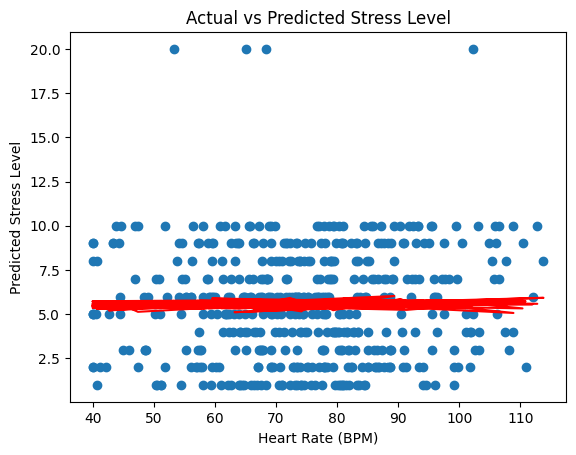

In [ ]:
# Assuming 'Heart Rate (BPM)' is a representative feature for visualization
plt.scatter(X_test['Heart Rate (BPM)'], y_test)
plt.plot(X_test['Heart Rate (BPM)'], y_pred, color='red')  # Plot predictions against the same feature
plt.xlabel("Heart Rate (BPM)")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level")
plt.show()

<ipython-input-77-709b0868ac0c>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


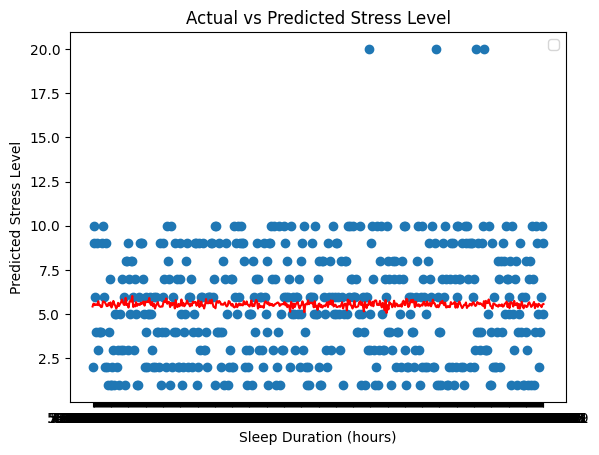

In [ ]:
# Assuming 'Heart Rate (BPM)' is a representative feature for visualization
plt.scatter(X_test['Sleep Duration (hours)'], y_test)
plt.plot(X_test['Sleep Duration (hours)'], y_pred, color='red')  # Plot predictions against the same feature
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Predicted Stress Level")
plt.title("Actual vs Predicted Stress Level")
plt.legend()
plt.show()